# Example to load and plot Antarctic GeoMap with python 
This notebook contains an example to import and plot GeoMap data (Cox et al., 2023).

Notebook written by Maximilian Lowe (maxwe32@bas.ac.uk), last updated 03/03/2024


Before this notebook can be executed, you need to download the GeoMap data from https://doi.pangaea.de/10.1594/PANGAEA.951482?format=html#download. Here you want to download the QGIS project (ATA_SCAR_GeoMAP_v2022_08_QGIS.zip).

The following two files should be copied into a sub-directory called "DATA": ATA_SCAR_GeoMAP_Geology_v2022_08.gpkg and ADD_Coastline.gpkg.


We start by importing the necessary libraries for this jupyter notebook

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry.polygon import Polygon

from PIL import Image
from IPython.display import display

Any QGIS project (gpkg) can be imported into python by using the geopandas library. 

In [2]:
%%time
GeoMap = gpd.read_file('DATA/ATA_SCAR_GeoMAP_Geology_v2022_08.gpkg', 
                       layer='ATA_GeoMAP_geological_units_v2022_08')

CPU times: total: 1min 19s
Wall time: 1min 23s


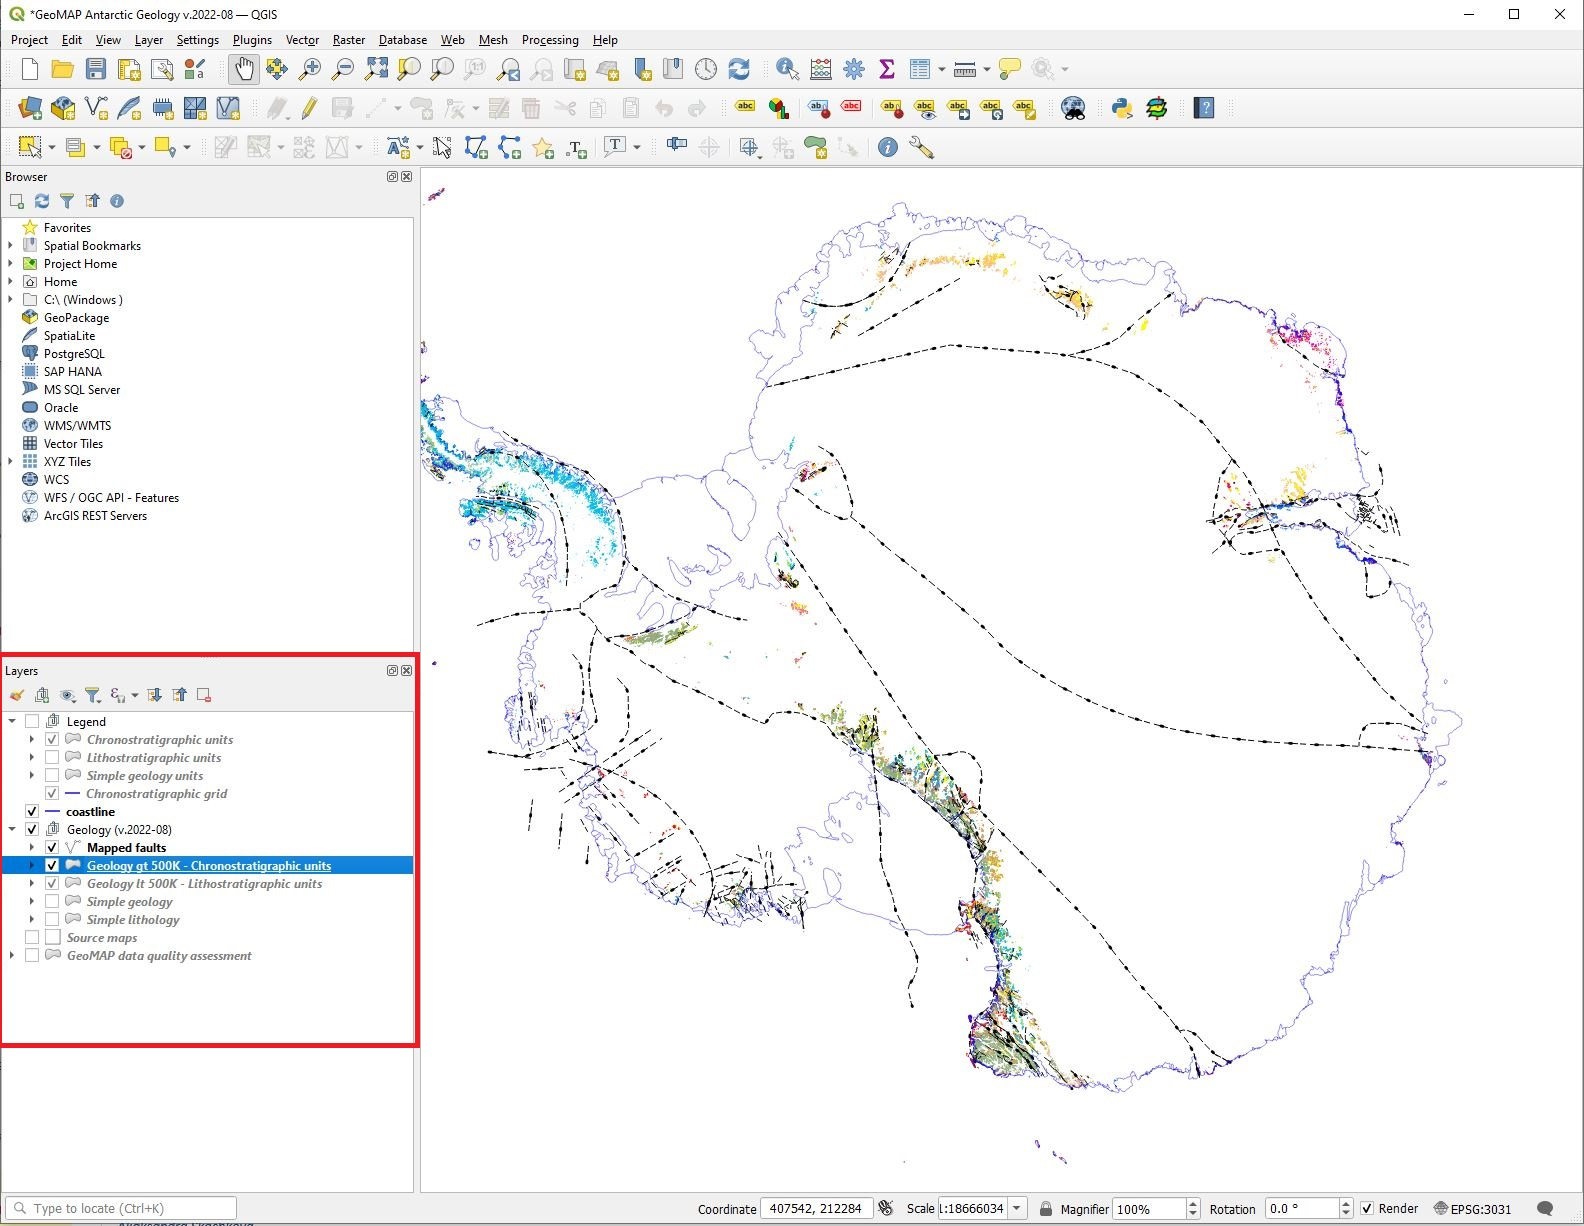

In [3]:
QGIS_screenshot = Image.open('Screenshots/QGIS_overview.jpg')
display(QGIS_screenshot)

Right click on a layer and open the properties. This should look something like the screenshots below:

For Faults:

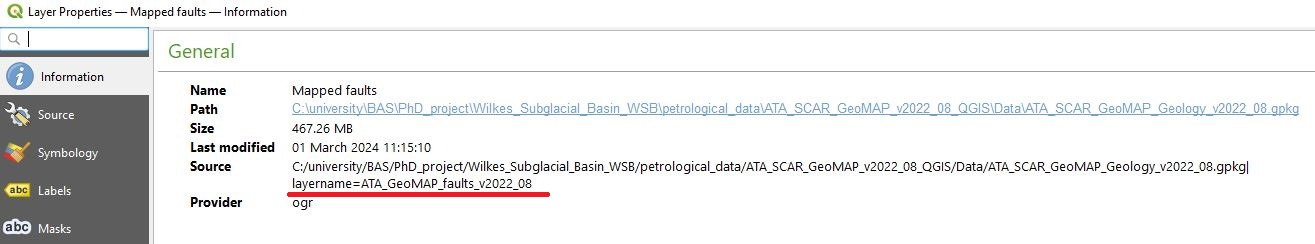

In [4]:
Fault_properties_QGIS = Image.open('Screenshots/properties_fault_information.jpg')
display(Fault_properties_QGIS)

For Geology:

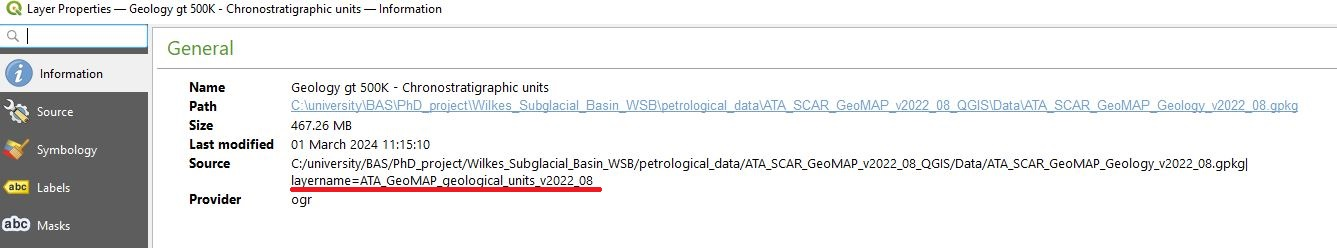

In [5]:
geology_properties_QGIS = Image.open('Screenshots/properties_geology_information.jpg')
display(geology_properties_QGIS)

Underlined with red is the layer name your are looking for

It is worhtwhile pointing out that loading the full project can take quite a while depending on your computer. For me it takes 1.min and 19 sec to load the project (The command "%%time" in the first cell prints out the runing time of the cell). I dont want load the full project every time I run the notebook. Therefore it makes seense to mask the area you want to load. 

To do so we first need to define a polygon, which we use later as a mask (code below). But first we import Coastline data from the GeoMap

In [6]:
Coastline = gpd.read_file("DATA/ADD_Coastline.gpkg")

# define polygon extend (here I use values for Queen Maud Land (QML) area)
x_ps_point_list = [-1.0e6, -1.0e6, 1.5e6, 1.5e6, -1.0e6]
y_ps_point_list = [1.0e6, 2.5e6, 2.5e6, 1.0e6, 1.0e6]

# create polygon and convert into a geopanda dataframe with a coordinate reference system (CRS) of WGS 84 / Antarctic Polar Stereographic
polygon_geom = Polygon(zip(x_ps_point_list, y_ps_point_list))
polygon_QML = gpd.GeoDataFrame(index=[0], crs="epsg:3031", geometry=[polygon_geom])

A quick polt ilustarting where the polygon is located. 

<AxesSubplot: >

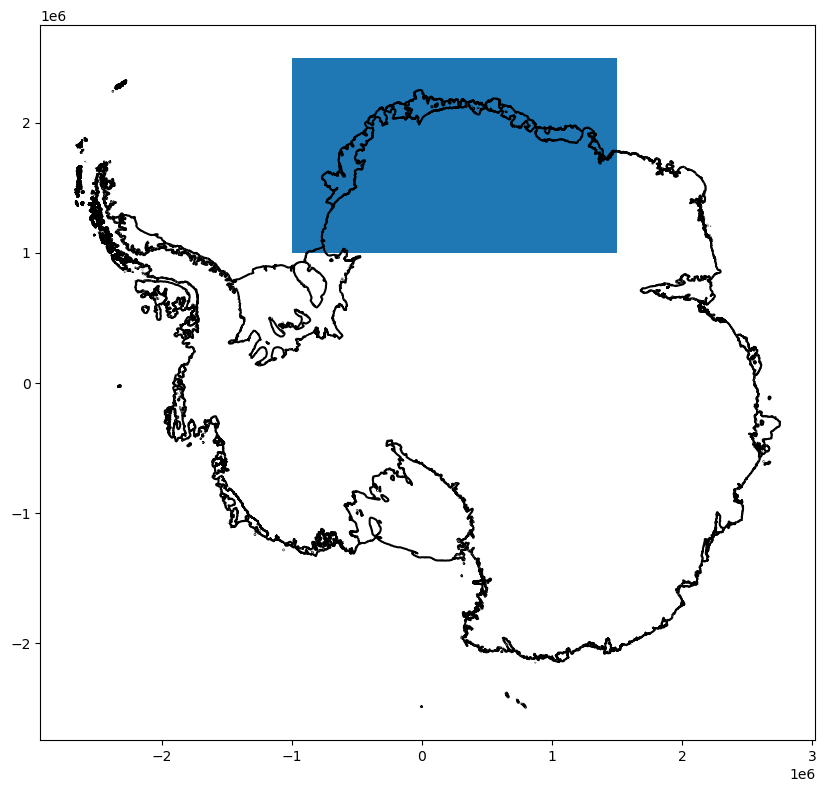

In [7]:
fig = plt.figure(figsize=[10, 10])
ax1 = plt.subplot(1, 1, 1)
Coastline.plot(ax=ax1, color="k")
polygon_QML.plot(ax=ax1)

If we are certain, that the mask is in the right location we can load GeoMap data only within our mask.

In [8]:
%%time
GeoMap_QML = gpd.read_file(
    "DATA/ATA_SCAR_GeoMAP_Geology_v2022_08.gpkg",
    layer="ATA_GeoMAP_geological_units_v2022_08",
    mask=polygon_QML,
)

CPU times: total: 7.61 s
Wall time: 7.71 s


This time it only takes 7.61 seconds instead of  1 min and 19 seconds to load the relevant data.

We now load the faults for the Queen Maud Land region:

In [9]:
faults_QML = gpd.read_file(
    "DATA/ATA_SCAR_GeoMAP_Geology_v2022_08.gpkg",
    layer="ATA_GeoMAP_faults_v2022_08",
    mask=polygon_QML,
)

We make a simple plot of the boundaries of the geological information polygons to confirm that the data is imported correctly.

<AxesSubplot: >

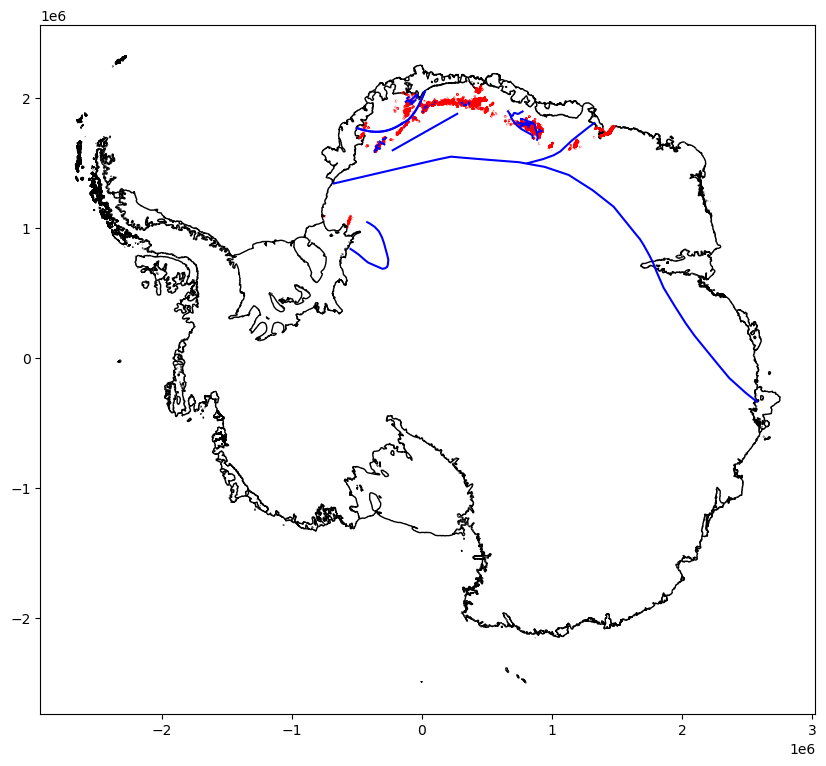

In [10]:
fig = plt.figure(figsize=[10, 10])
ax1 = plt.subplot(1, 1, 1)
Coastline.plot(ax=ax1, color="k", lw=1)
GeoMap_QML.boundary.plot(ax=ax1, color="red")
faults_QML.plot(ax=ax1, color="blue")

Lets inspect the GeoMap_QML data frame. But first we need to expand the displayed columns and rows

In [11]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 6)
GeoMap_QML

,objectid,MAPSYMBOL,PLOTSYMBOL,NAME,DESCR,POLYGTYPE,MBREQUIV,FMNEQUIV,SBGRPEQUIV,GRPEQUIV,SPGRPEQUIV,TERREQUIV,STRATRANK,SIMPCODE,SIMPCLASS,SIMPDESC,TYPENAME,TYPE_URI,LITHOLOGY,REPLITH_URI,GEOLHIST,REPAGE_URI,YNGAGE_URI,OLDAGE_URI,ABSMIN_MA,ABSMAX_MA,AGECODE,LITHCODE,SOURCECODE,SOURCE,OBSMETHOD,CONFIDENCE,POSACC_M,METADATA,FEATUREID,REGION,TECTPROV,RESSCALE,CAPTSCALE,CAPTDATE,MODDATE,SPEC_URI,SYMBOL,Shape_Length,Shape_Area,geometry
0,77506,Md,Md,Worsfoldfjellet monzonorite (Sivorg Terrane),Monzonite containing white K-feldspar phenocry...,rock,,Worsfoldfjellet monzonorite,,,,Sivorg Terrane,formation,60,Proterozoic-Paleozoic,"Intrusive rock - granitoid, diorite, gabbro an...",lithostratigraphic unit,http://resource.geosciml.org/classifier/cgi/ge...,monzonite,http://resource.geosciml.org/classifier/cgi/li...,Mesoproterozoic,http://resource.geosciml.org/classifier/ics/is...,http://resource.geosciml.org/classifier/ics/is...,http://resource.geosciml.org/classifier/ics/is...,1045.0,1080.0000,M,d,1120,Abu-Alam et al. 2018 after Jacobs et al. 2004a,synthesis from multiple sources,,250,https://data.gns.cri.nz/metadata/srv/eng/catal...,ATA_GeoMAP_geological_units_77506,East Antarctica,Kalahari Craton,250000,50000,2017-01-01,2018-06-11,http://www.opengis.net/def/nil/OGC/0/missing,Md,5876.047909,4.685655e+05,"MULTIPOLYGON (((-358537.991 1584537.964, -3585..."
1,77498,Mg,Mg,Cottontoppen granite (Sivorg Terrane),"Leucocratic, fine- to medium-grained muscovite...",rock,,Cottontoppen granite,,,,Sivorg Terrane,formation,60,Proterozoic-Paleozoic,"Intrusive rock - granitoid, diorite, gabbro an...",lithostratigraphic unit,http://resource.geosciml.org/classifier/cgi/ge...,granite,http://resource.geosciml.org/classifier/cgi/li...,Mesoproterozoic,http://resource.geosciml.org/classifier/ics/is...,http://resource.geosciml.org/classifier/ics/is...,http://resource.geosciml.org/classifier/ics/is...,1050.0,1170.0000,M,g,1118,Abu-Alam et al. 2018 after Jacobs et al. 2004a,synthesis from multiple sources,,250,https://data.gns.cri.nz/metadata/srv/eng/catal...,ATA_GeoMAP_geological_units_77498,East Antarctica,Kalahari Craton,250000,50000,2017-01-01,2018-06-11,http://www.opengis.net/def/nil/OGC/0/missing,Mg,226.985150,3.247618e+03,"MULTIPOLYGON (((-359900.810 1585466.857, -3598..."
2,77499,Mg,Mg,Cottontoppen granite (Sivorg Terrane),"Leucocratic, fine- to medium-grained muscovite...",rock,,Cottontoppen granite,,,,Sivorg Terrane,formation,60,Proterozoic-Paleozoic,"Intrusive rock - granitoid, diorite, gabbro an...",lithostratigraphic unit,http://resource.geosciml.org/classifier/cgi/ge...,granite,http://resource.geosciml.org/classifier/cgi/li...,Mesoproterozoic,http://resource.geosciml.org/classifier/ics/is...,http://resource.geosciml.org/classifier/ics/is...,http://resource.geosciml.org/classifier/ics/is...,1050.0,1170.0000,M,g,1118,Abu-Alam et al. 2018 after Jacobs et al. 2004a,synthesis from multiple sources,,250,https://data.gns.cri.nz/metadata/srv/eng/catal...,ATA_GeoMAP_geological_units_77499,East Antarctica,Kalahari Craton,250000,50000,2017-01-01,2018-06-11,http://www.opengis.net/def/nil/OGC/0/missing,Mg,350.664682,5.805428e+03,"MULTIPOLYGON (((-359738.982 1585584.248, -3597..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8716,89686,Hc,Hd,Holocene beach and raised marine deposits,"Loose beach sand, gravel, rounded boulders; ma...",moraine,,,,,,,not specified,22,Quaternary-Neogene,"Unconsolidated coastal ice-shelf till, beach o...",lithogenetic unit,http://resource.geosciml.org/classifier/cgi/ge...,"sand, gravel",http://resource.geosciml.org/classifier/cgi/li...,Holocene,http://resource.geosciml.org/classifier/ics/is...,http://resource.geosciml.org/classifier/ics/is...,http://resource.geosciml.org/classifier/ics/is...,0.0,0.0117,H,c,Hb,GeoMAP,synthesis from multiple sources,,250,https://data.gns.cri.nz/metadata/srv/

Now that we have the data we can start thinking which data we want to plot. For an overview we plot the unique entries within different colums:

In [12]:
GeoMap_QML["FMNEQUIV"].unique()

array(['Worsfoldfjellet monzonorite', 'Cottontoppen granite',
       'Månesigden porphyritic granite', 'Refsdahlbrekka granodiorite',
       '', 'inapplicable',
       'Undifferentiated metavolcanosedimentary rocks (Sivorg Terrane)',
       'Juckeskammen orthogneiss',
       'Metasedimentary rocks (Sivorg Terrane)',
       'Metavolcanic rocks (Sivorg Terrane)', 'Amelang Formation',
       'Quartzitic mylonite (Kirwanveggen complex)', 'Fish Gneiss',
       'Buråsbotnen augen gneiss', 'Vikenegga tonalite',
       'Undifferentiated metavolcanosedimentary rocks (Kottas Terrane)',
       'Granulite (Vardeklettane Terrane) ', 'Cottontoppen diorite',
       'Laudalkammen granite', 'Ferrar Dolerite', 'granitoid',
       'Annandagstoppane gabbro', 'Framryggen Formation',
       'Mafic sills (Borgmassivet Intrusive Suite)', 'Högfonna Formation',
       'Pyramiden Formation', 'Uven Formation', 'Kuvungen Formation',
       'Raudberget Formation', 'Augen gneiss (Kirwanveggen complex)',
       'Anna

In [13]:
GeoMap_QML["GRPEQUIV"].unique()

array(['', 'inapplicable', 'Kirwanveggen complex', 'Ahlmannryggen Group',
       'Borgmassivet Intrusive Suite', 'Urfjell Group',
       'Jultulstraumen Group', 'unknown', 'Fuglefjellet Complex',
       'Rootshorga Complex', 'Jutulrøra complex',
       'Straumsvola-Tvora alkaline complex'], dtype=object)

In [14]:
GeoMap_QML["SPGRPEQUIV"].unique()

array(['', 'inapplicable', 'Kirwanveggen complex', 'Ferrar Supergroup',
       'Ritscherflya Supergroup', 'Fuglefjellet Complex',
       'Rootshorga Complex', 'Jutulrøra complex',
       'Straumsvola-Tvora alkaline complex'], dtype=object)

In [15]:
GeoMap_QML["TECTPROV"].unique()

array(['Kalahari Craton', 'Central Antarctic Craton',
       'Indo-Antarctic Craton'], dtype=object)

We want to plot the geological information within the SPGRPEQUIV colum together with active faults and the coastline. So first, we extract the data and plot it on an Antarctic map

In [16]:
Kirwanveggen_complex = GeoMap_QML[
    (GeoMap_QML["SPGRPEQUIV"] == "Kirwanveggen complex")
]
Ferrar_Supergroup = GeoMap_QML[
    (GeoMap_QML["SPGRPEQUIV"] == "Ferrar Supergroup")
]
Ritscherflya_Supergroup = GeoMap_QML[
    (GeoMap_QML["SPGRPEQUIV"] == "Ritscherflya Supergroup")
]
Fuglefjellet_Complex = GeoMap_QML[
    (GeoMap_QML["SPGRPEQUIV"] == "Fuglefjellet Complex")
]
Rootshorga_Complex = GeoMap_QML[
    (GeoMap_QML["SPGRPEQUIV"] == "Rootshorga Complex")
]
Jutulrøra_complex = GeoMap_QML[
    (GeoMap_QML["SPGRPEQUIV"] == "Jutulrøra complex")
]
Straumsvola_Tvora_alkaline_complex = GeoMap_QML[
    (GeoMap_QML["SPGRPEQUIV"] == "Straumsvola-Tvora alkaline complex")
]
active_fault_QML = faults_QML[
    faults_QML["DESCR"] == "fault (inactive), feature inferred"
]

Now we plot the data

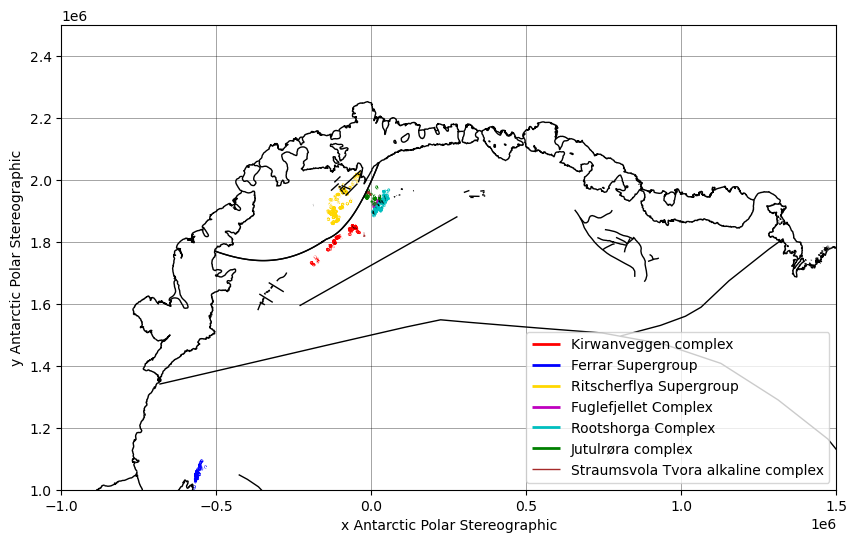

In [17]:
figure1 = plt.figure(figsize=[10, 10], facecolor="white")
ax1 = plt.subplot(1, 1, 1)

Kirwanveggen_complex.boundary.plot(
    ax=ax1, color="red", alpha=1, linewidth=2, label="Kirwanveggen complex"
)

Ferrar_Supergroup.boundary.plot(
    ax=ax1, color="blue", alpha=1, linewidth=2, label="Ferrar Supergroup"
)

Ritscherflya_Supergroup.boundary.plot(
    ax=ax1, color="gold", alpha=1, linewidth=2, label="Ritscherflya Supergroup"
)

Fuglefjellet_Complex.boundary.plot(
    ax=ax1, color="m", alpha=1, linewidth=2, label="Fuglefjellet Complex"
)

Rootshorga_Complex.boundary.plot(
    ax=ax1, color="c", alpha=1, linewidth=2, label="Rootshorga Complex"
)

Jutulrøra_complex.boundary.plot(
    ax=ax1, color="green", alpha=1, linewidth=2, label="Jutulrøra complex"
)

Straumsvola_Tvora_alkaline_complex.boundary.plot(
    ax=ax1,
    color="brown",
    alpha=1,
    linewidth=1,
    label="Straumsvola Tvora alkaline complex",
)

faults_QML.plot(ax=ax1, color="k", linewidth=1)

Coastline.plot(ax=ax1, color="k", linewidth=1)

ax1.set_xlim([min(x_ps_point_list), max(x_ps_point_list)])
ax1.set_ylim([min(y_ps_point_list), max(y_ps_point_list)])
ax1.grid(color="k", linestyle="-", linewidth=0.5, alpha=0.5)
plt.xlabel("x Antarctic Polar Stereographic")
plt.ylabel("y Antarctic Polar Stereographic")
ax1.legend(loc="lower right")

Last remark: With geopandas you can either plot the bondaries of the geological polygon, which allows to manipulate the linewidth (as above) or you can plot the intrior of the polygon as we did when we created the mask. This will color in only the actual area. However, if the polyhon is very small it is sometimes hard to see.